# Take a look at the bootstrapped metrics

In [2]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df_results = pd.read_csv('../results/model_bootsrapped_results.csv')

In [5]:
df_mean = pd.read_csv('../results/mean_bootsrapped_results.csv')

In [6]:
df_median = pd.read_csv('../results/median_bootsrapped_results.csv')

In [7]:
df_median.describe()

,r2,mae,mse,mdae,median_delta_e,mean_delta_e
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.309609,0.239101,0.172991,0.031527,11.964449,28.612249
std,0.021764,0.009049,0.007676,0.007278,3.673638,0.823581
min,-0.394471,0.208596,0.146116,0.026144,10.065196,25.584624
25%,-0.323962,0.232990,0.167742,0.026144,10.065196,28.038107
50%,-0.308852,0.238995,0.172926,0.026144,10.065196,28.605860
75%,-0.294478,0.245250,0.178170,0.039216,10.065196,29.178396
max,-0.241404,0.270085,0.200326,0.056209,27.503301,32.154241


In [8]:
df_mean.describe()

,r2,mae,mse,mdae,median_delta_e,mean_delta_e
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.001557,0.312619,0.131295,0.226624,20.205102,30.243022
std,0.001450,0.004318,0.003686,0.001713,2.217248,0.466470
min,-0.015163,0.295464,0.116602,0.225949,19.173710,28.397520
25%,-0.002129,0.309699,0.128792,0.225949,19.173710,29.930906
50%,-0.001127,0.312572,0.131203,0.225949,19.173710,30.245186
75%,-0.000529,0.315563,0.133756,0.225949,19.173710,30.541071
max,-0.000004,0.329224,0.144976,0.251439,29.171411,32.078628


In [9]:
maes =   {'model': ['GBDT'] * len(df_results) + ['mean dummy'] * len(df_mean) + ['median dummy'] * len(df_median),
          'mae': list(df_results['mae']) + list(df_mean['mae']) + list(df_median['mae'])
         }

In [10]:
delta_es =   {'model': ['GBDT'] * len(df_results) + ['mean dummy'] * len(df_mean) + ['median dummy'] * len(df_median),
          'es': list(df_results['median_delta_e']) + list(df_mean['median_delta_e']) + list(df_median['median_delta_e'])
         }

In [11]:
delta_r2 =   {'model': ['GBDT'] * len(df_results) + ['mean dummy'] * len(df_mean) + ['median dummy'] * len(df_median),
          'r2': list(df_results['r2']) + list(df_mean['r2']) + list(df_median['r2'])
         }

In [12]:
df_mae = pd.DataFrame(maes)

In [13]:
df_es = pd.DataFrame(delta_es)

In [14]:
df_r2 = pd.DataFrame(delta_r2)

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  import sys
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


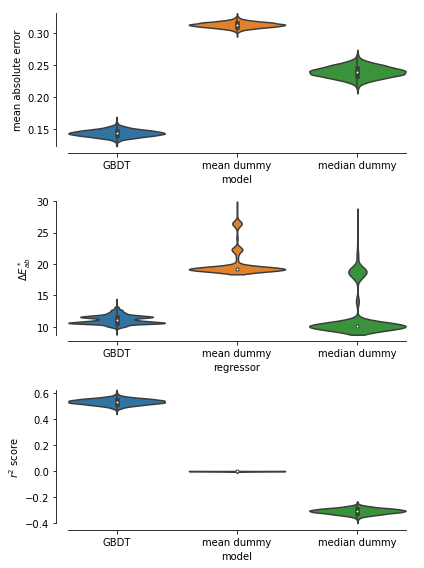

In [22]:
fig, ax = plt.subplots(3,1, figsize=(6,8))


for a in ax:
    a.spines['top'].set_color('none')
    a.spines['right'].set_color('none')
    a.spines['left'].set_smart_bounds(True)
    a.spines['bottom'].set_smart_bounds(True)

sns.violinplot(data=df_mae, x='model', y='mae', ax=ax[0], scale='width')
sns.violinplot(data=df_es, x='model', y='es', ax=ax[1], scale='width')
sns.violinplot(data=df_r2, x='model', y='r2', ax=ax[2], scale='width')

ax[1].set_xlabel('regressor')
ax[0].set_ylabel('mean absolute error')
ax[1].set_ylabel(r'$\Delta E^*_{ab}$')
ax[2].set_ylabel(r'$r^2$ score')

fig.tight_layout()

fig.savefig('../results/metrics_bootsrapped.pdf', bbox_inches='tight')

In [26]:
np.percentile(df_results['r2'], 95)

0.5710940885489546

In [27]:
np.percentile(df_results['r2'], 5)

0.4967550797531707

In [38]:
df_results['mean_delta_e'].median()

16.835198997875906

In [34]:
df_mean['r2'].mean()

-0.0015568588120349976

In [35]:
np.percentile(df_mean['r2'], 95)

-0.0001468861250421819

In [36]:
np.percentile(df_mean['r2'], 5)

-0.004435873880890011

In [39]:
np.percentile(df_results['mean_delta_e'], 5)

15.868903507514442

In [40]:
np.percentile(df_results['mean_delta_e'], 95)

17.837790694812472

In [50]:
df_median['mean_delta_e'].mean()

28.61224900065459